In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('../Capstone_Project_3/dataframe_clean.pkl', 'rb') as f:
    df = pickle.load(f)

In [3]:
df = df[[c for c in df.columns if c not in ['Sample_Weights', 'Pneumonia_Vaccine', 'Flu_Shot']]]
df['Heart_Disease'] = df['Heart_Disease'].replace(0.0, 2.0)
df = df.astype(float)

In [ ]:
df.info()

In [5]:
def df_value_counts(dataframe):

    for column in dataframe.columns:
        print(dataframe[column].value_counts())
        print()

In [ ]:
df_value_counts(df)

In [7]:
cols = ['Good_Health', 'Health_Insurance', 'Hypertension', 'High_Cholesterol', 'Arthritis', 'Heavy_Drinker', 'Seatbelt', 'HIV', 'Heart_Disease', 
          'Bronchitis', 'Depression', 'Kidney_Disease', 'Diabetes', 'Sodium']

df[cols] = df[cols].replace({1.0:'Yes', 2.0:'No', 7.0:'Other', 9.0:'Other', 999.0:'Other'})
df['Asthma_Status'] = df['Asthma_Status'].replace({1.0:'Yes', 2.0:'Former', 3.0:'No', 9.0:'Other'})
df['Smoker_Status'] = df['Smoker_Status'].replace({1.0:'Yes', 2.0:'Yes', 3.0:'Former', 4.0:'No', 9.0:'Other'})
df['Race'] = df['Race'].replace({1.0:'White', 2.0:'Black', 3.0:'Other Race', 4.0:'Multiracial', 5.0:'Hispanic', 9.0:'Unknown'})
df['Age_Cat'] = df['Age_Cat'].replace({1.0:'Age 18 to 24', 2.0:'Age 25 to 34', 3.0:'Age 35 to 44', 4.0:'Age 45 to 54', 5.0:'Age 55 to 64', 6.0:'Age 65 or older'})
df['Education_Level'] = df['Education_Level'].replace({1.0:'No High School', 2.0:'Graduated High School', 3.0:'Attended College', 4.0:'Graduated College', 9.0:'Other'})
df['Income_Level'] = df['Income_Level'].replace({1.0:'< $15,000', 2.0:'\$15,000 - $25,000', 3.0:'\$25,000 - $35,000', 4.0:'\$35,000 - $50,000', 5.0:'\$50,000+', 9.0:'Other'})
df['Physical_Activity'] = df['Physical_Activity'].replace({1.0:'Highly Active', 2.0:'Active', 3.0:'Insufficiently Active', 4.0:'Inactive', 9.0:'Other'})
df['Marital_Status'] = df['Marital_Status'].replace({1.0:'Married', 2.0:'Divorced', 3.0:'Widowed', 4.0:'Separated', 5.0:'Never married', 6.0:'Unmarried couple member', 9.0:'Other'})
df['SEX'] = df['SEX'].replace({1.0:'Male', 2.0:'Female'})
df['BMI_Cat'] = df['BMI_Cat'].replace({1.0:'Underweigth', 2.0:'Normal weight', 3.0:'Overweight', 4.0:'Obese', 999.0:'Other'})

import regex as re

for column in df.columns:
    renamed = column
    renamed = re.sub('_', ' ', renamed)
    renamed = re.sub('Cat', 'Category', renamed)
    renamed = re.sub('SEX', 'Sex', renamed)

    df = df.rename(columns={column:renamed})

In [ ]:
df_value_counts(df)

In [9]:
health_conditions = ['Good Health', 'Hypertension', 'High Cholesterol', 'Asthma Status', 'Arthritis', 'Smoker Status', 'Heavy Drinker', 'HIV', 'Bronchitis', 'Depression', 'Kidney Disease', 
                     'Diabetes', 'Sodium', 'Heart Disease']
demographic_features = ['Health Insurance', 'Race', 'Age Category', 'BMI Category', 'Education Level', 'Income Level', 'Physical Activity', 'Seatbelt', 'Sex', 'Marital Status']
demo_orders = {
    'Health Insurance':['No', 'Yes', 'Other'],
    'Race':['White', 'Black', 'Hispanic', 'Multiracial', 'Other Race', 'Unknown'],
    'Age Category':['Age 18 to 24', 'Age 25 to 34', 'Age 35 to 44', 'Age 45 to 54', 'Age 55 to 64', 'Age 65 or older'],
    'BMI Category':['Underweigth', 'Normal weight', 'Overweight', 'Obese', 'Other'],
    'Education Level':['No High School', 'Graduated High School', 'Attended College', 'Graduated College', 'Other'],
    'Income Level':['< $15,000', '\$15,000 - $25,000', '\$25,000 - $35,000', '\$35,000 - $50,000', '\$50,000+', 'Other'],
    'Physical Activity':['Inactive', 'Insufficiently Active', 'Active', 'Highly Active', 'Other'],
    'Seatbelt':['No', 'Yes', 'Other'],
    'Sex':['Male', 'Female'],
    'Marital Status':['Never married', 'Married', 'Unmarried couple member', 'Separated', 'Divorced', 'Widowed', 'Other']
}

In [ ]:
for column in health_conditions:
    count_series = df[column].value_counts()
    if 'Former' in count_series.index:
        count_series = count_series[['No', 'Yes', 'Former', 'Other']]
    elif 'Other' not in count_series.index:
        count_series = count_series[['No', 'Yes']]
    else:
        count_series = count_series[['No', 'Yes', 'Other']]
    x = count_series.index
    h = count_series.values
    plt.bar(x, h)
    plt.title(column)
    plt.show()

In [11]:
def count_plot(data, x, hue, order_x=None, order_hue=None, x_excluded=None, hue_excluded=None, normalize=False, ax=None):
    order = False
    if order_x == None:
        order_x = data[x].unique()
    else:
        order = True
    if order_hue == None:
        order_hue = data[hue].unique()
    else:
        order = True

    excluded = False
    if x_excluded == None:
        x_excluded = []
    else:
        excluded = True
    if hue_excluded == None:
        hue_excluded = []
    else:
        excluded = True
    
    #Organizing categories in correct order
    if order == True:
        multi_order = []
        for i in order_x:
            for j in order_hue:
                multi_order.append((i, j))

    #Making dataframe
    data_ = data.groupby(x)[hue].value_counts(normalize=normalize)
    if normalize:
        data_ = data_ * 100
    
    if order == True:
        data_ = data_[multi_order]

    if excluded:
        filter = [(index[0] not in x_excluded) and (index[1] not in hue_excluded) for index in data_.index]
        data_ = data_[filter]

    if normalize:
        y_label = 'Percentage'
    else:
        y_label = 'Counts'

    data_ = pd.DataFrame(data_).rename(columns={hue:y_label}).reset_index()
    
    #Plotting
    ax = sns.barplot(data=data_, x=x, y=y_label, hue=hue, ax=ax)

    #Calculating percentages to put as text
    if not normalize:
        temp_series = (data.groupby(x)[hue].value_counts(normalize=True) * 100).round().astype(int).astype(str)
        if order == True:
            temp_series = temp_series[multi_order]
        if excluded:
            temp_series = temp_series[filter]
        text_labels = temp_series.values
        text_labels = [text + '%' for text in text_labels]

        #Getting bar rectangles
        rects = list(ax.patches)
        rects.sort(key=lambda x: x.get_x())

        #Adding text labels on top of bar rectangles
        for rect, label in zip(rects, text_labels):
            height = rect.get_height()
            ax.text(
                rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom"
            )

# Prevalence of Depression Among Different Demographics

We wish to investigate how the prevalence of depression varies among different demographic groups. This data exploration will hopefully lead to new avenues of research that can more deeply understand the reasons for the disproportionate rates of depression among different demographic groups.

## Percentage of the USA Population that Reported Having Depression

About a fifth of the population reported having had depression. This proportion, however, is not the same among different demographic groups.

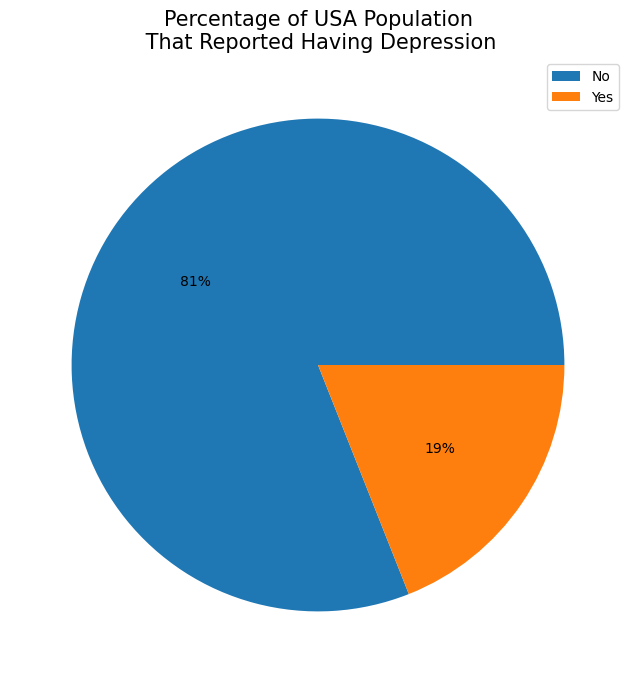

In [12]:
pct = (df['Depression'].value_counts(normalize=True) * 100).drop('Other')
plt.figure(figsize=(8, 8))
plt.pie(pct, labels=pct.index, autopct='%.0f%%', labeldistance=None)
plt.title('Percentage of USA Population\n That Reported Having Depression', fontsize=15)
plt.legend()
plt.show()

# Overall General Health

First, it is worthwhile to notice that the rate of individuals with depression among those that reported having good general health was less than those who reported having bad general health by about 20%.

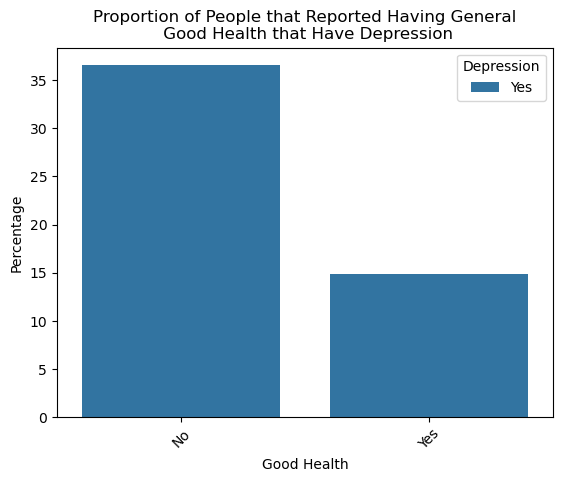

In [13]:
count_plot(df, 'Good Health', 'Depression', x_excluded=['Other'], hue_excluded=['No', 'Other'], normalize=True)
plt.xticks(rotation=45)
plt.title('Proportion of People that Reported Having General\n Good Health that Have Depression')
plt.show()

In [14]:
demo_interested = ['Race', 'Age Category', 'BMI Category', 'Income Level', 'Physical Activity', 'Sex', 'Marital Status']
demo_dict = {demo:demo_orders[demo] for demo in demo_interested}

In [15]:
def plot_func(demo):
    count_plot(df, demo, 'Depression', order_x = demo_dict[demo], x_excluded=['Other', 'Unknown'], hue_excluded=['No', 'Other'], normalize=True)
    plt.xticks(rotation=45)
    plt.gca().axhline(pct['Yes'], color='r', label='National Average', linestyle='--')
    plt.title('Percentage of Individuals that Reported Having Depression')
    plt.legend().get_texts()[1].set_text('Depression Rate')
    plt.show()

## Sex

A higher proportion of females reported having depression. It should be noted that this does not necessarily mean females are more likely to have depression since it's possible these results are due in part to response bias, especially given the fact that people might be unwilling to admit they have depression due to the social stigma attached to it.

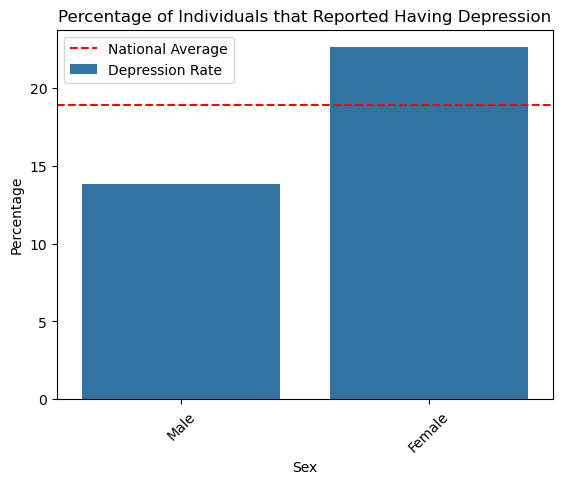

In [16]:
plot_func('Sex')
plt.show()

## Race

Of note is the group of people that reported to be multiracial has a noticeably larger proportion of individuals that reported having depression. For all groups, however, the proportion is close to the overall proportion of about 20%. 

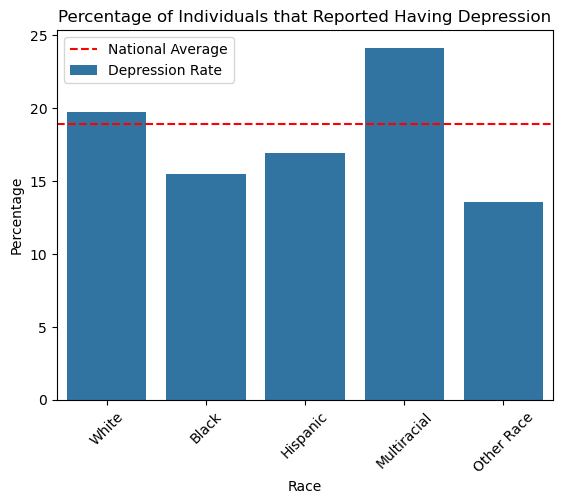

In [17]:
plot_func('Race')

## Age

Immediately noticeable is the trend that the rate of people reporting having depression increases with age. The large drop in the category of "Age 65 and older" could have something to do with the fact that this group includes a significantly larger range of ages than the other groups.

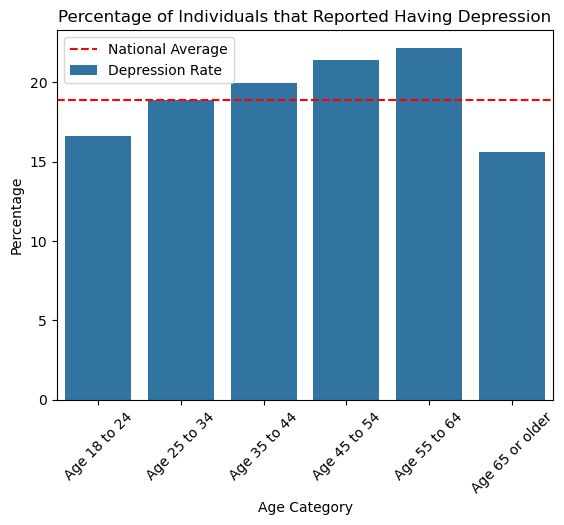

In [18]:
plot_func('Age Category')

## BMI Index

The groups with the largest proportion of individuals that reported having depression are "Underweight" and "Obese". This is intuitive given the fact that these two categories are considered to be less healthy than others by the medical community and, as previously seen, rates of depression seem to correlate with bad health.

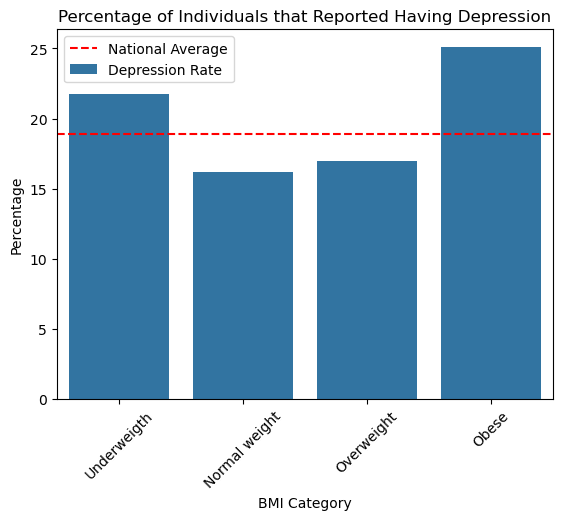

In [19]:
plot_func('BMI Category')

## Income

There is a very noticeable trend where rates of people reporting having depression decrease with increasing income. The difference in rates in the lowest and highest group is quite stark: close to 35% of individuals with a yearly income less than $15, 000 versus close to 15% for those with more than $50, 000 of yearly income.

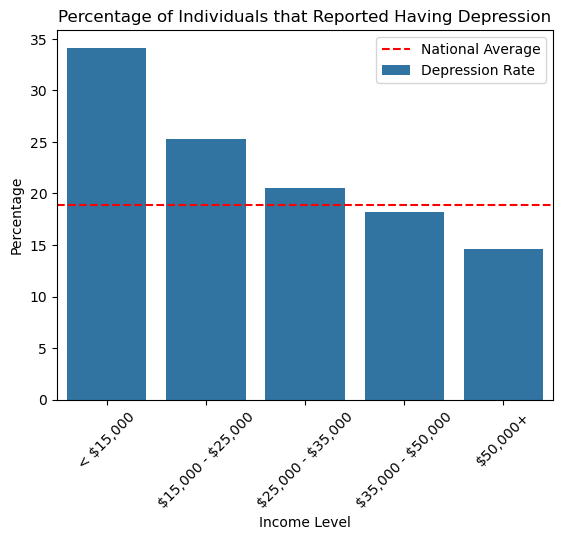

In [20]:
plot_func('Income Level')

## Physical Activity

There is a clear trend of lower rates of individuals reporting that they have depression with increasing physical activity. Again, this is consistent with our previous observation that depression seems to be more prevalent among individuals with bad general health.

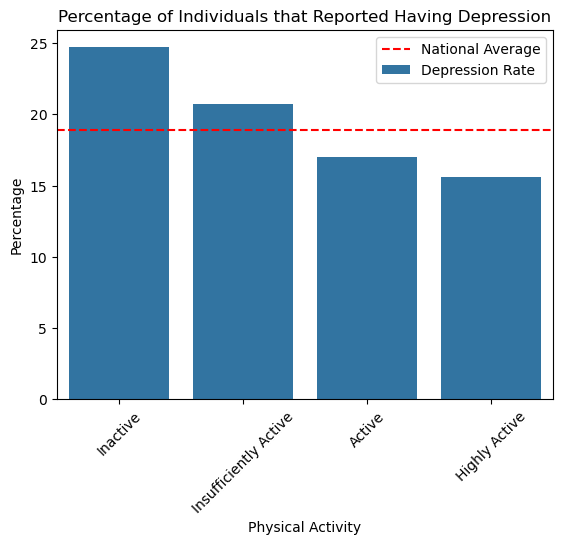

In [21]:
plot_func('Physical Activity')

## Marital Status

The group of individuals who are separated has a rate of about 33%, significantly higher than the national average of about 20%. Another interesting observation is that, among the three categories that indicate separation between married individuals (separated, divorced, and widowed), the widowed category is near the national average while the other two are significantly higher. 

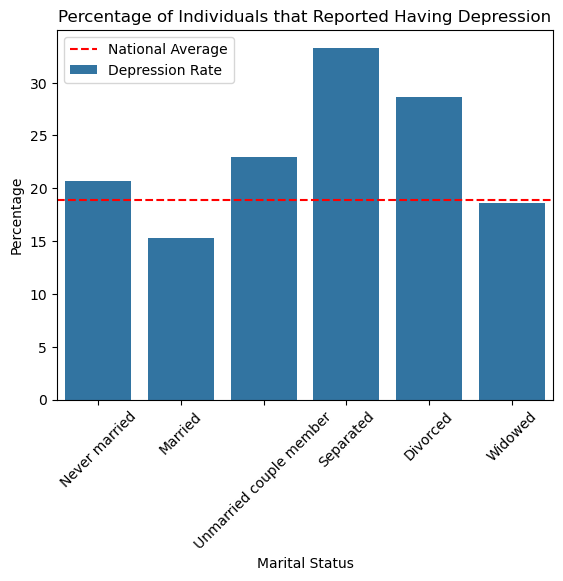

In [22]:
plot_func('Marital Status')

# Conclusions

We set out to explore the prevalence of depression among different demographic groups. We observed that while the rate of individuals that reported to have depression in this sample from the United States is close to 20%, this rate can be much higher among different demographic groups. 

Some demographic groups that were observed to have a higher rate of depression are individuals who are females, multiracial, underweight, separated from their spouse, and divorced. We also observed a negative correlation between rates of depression and annual income, a negative correlation between rates of depression and physical activity, and a positive correlation between rates of depression and age.

We hope that these observations can open up new avenues of research that might shed light on the reasons for disproportionate rates of depression among different demographic groups.